In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1556,2020-09-07,United Kingdom,345947.0,347152.0,41592.0,41551.0,-1205.0,41.0
1557,2020-09-07,Germany,251796.0,250799.0,9335.0,9325.0,997.0,10.0
1558,2020-09-07,Iran,388667.0,386658.0,22401.0,22293.0,2009.0,108.0
1559,2020-09-07,Turkey,279527.0,279806.0,6662.0,6673.0,-279.0,-11.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  8771.691864189623
RMSE =  33619.866950396034


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  300.7706598334401
RMSE =  740.6673605698127


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  62477.83108108108
RMSE =  105804.28553877967
-- World performances for deaths --
MAE =  1696.5202702702702
RMSE =  2074.4991987647704


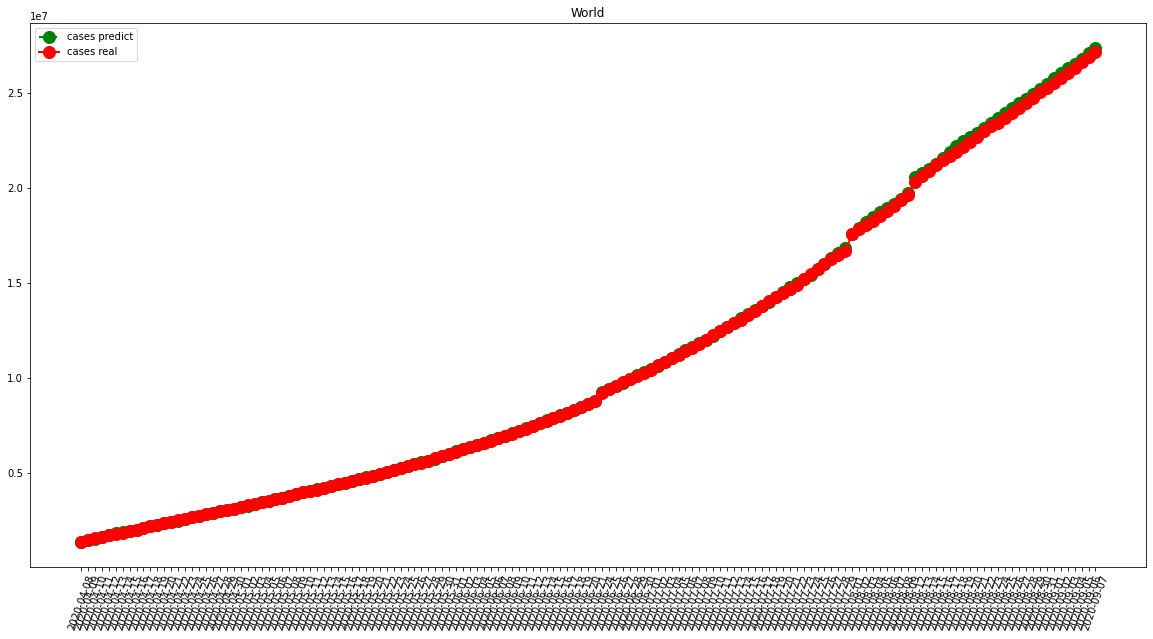

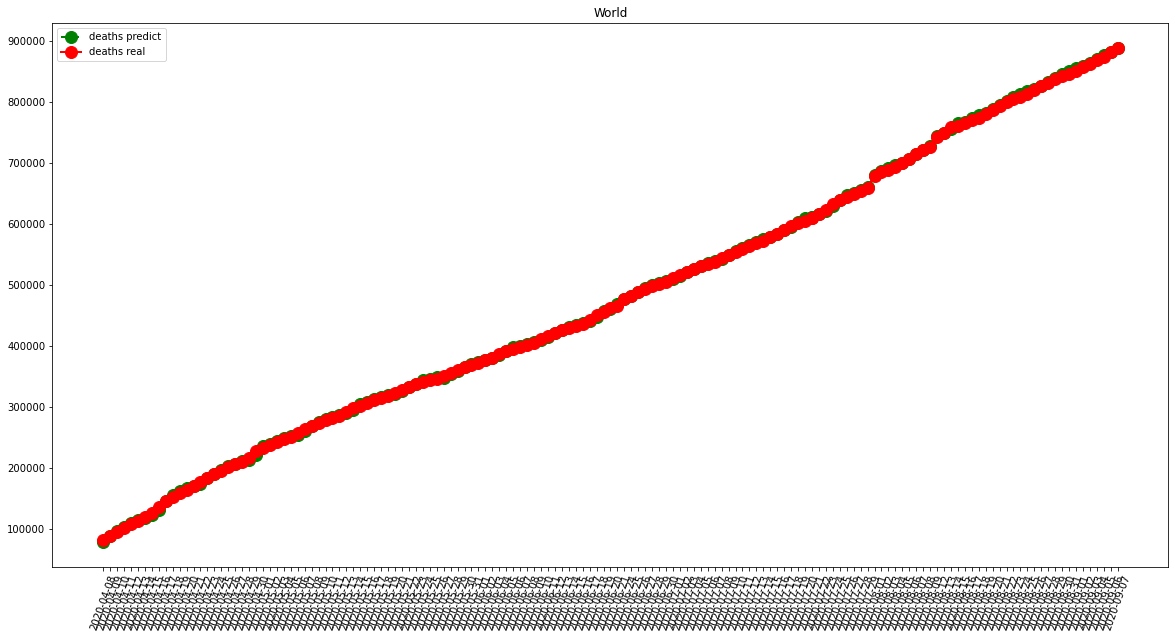

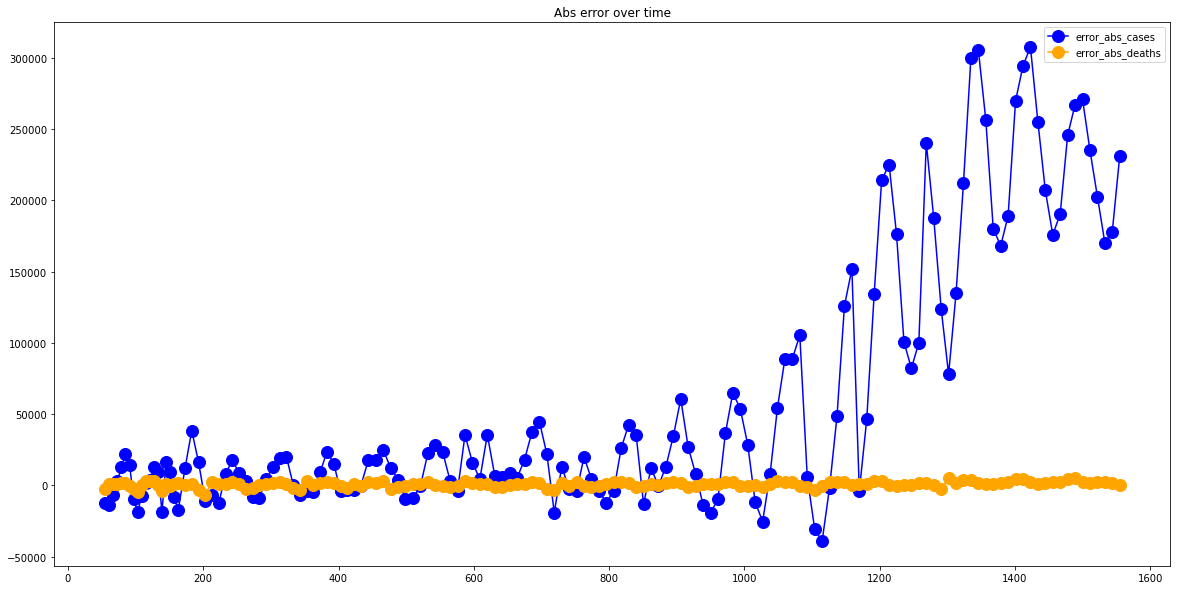

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1020.4556962025316
RMSE =  1525.1101267561555
-- France performances for deaths --
MAE =  118.93037974683544
RMSE =  266.8969720152068


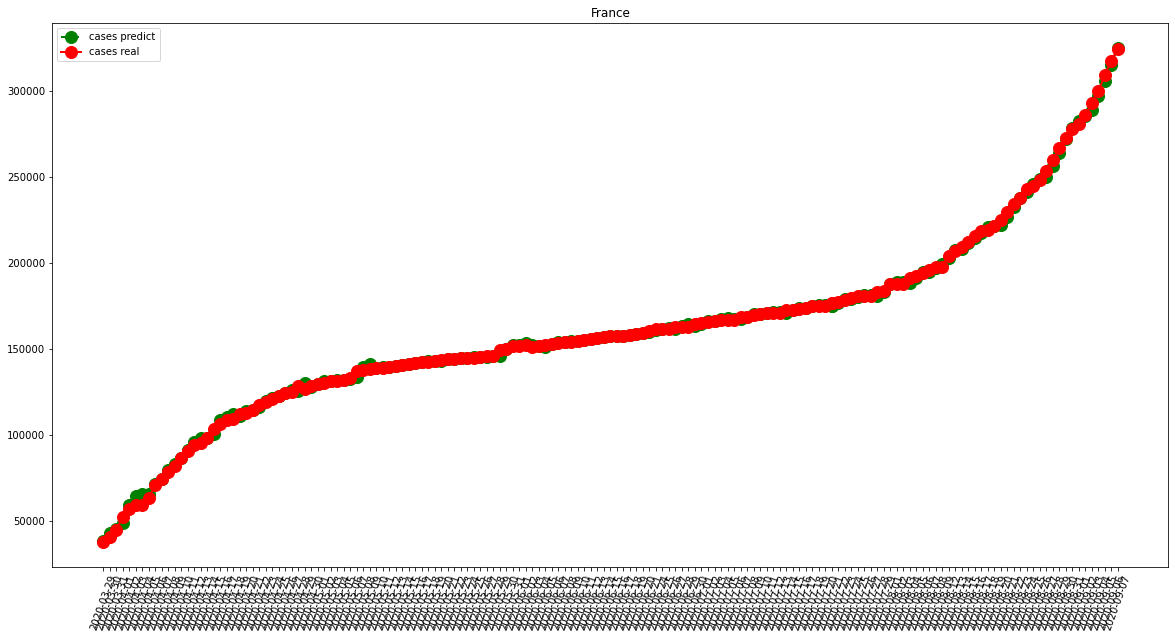

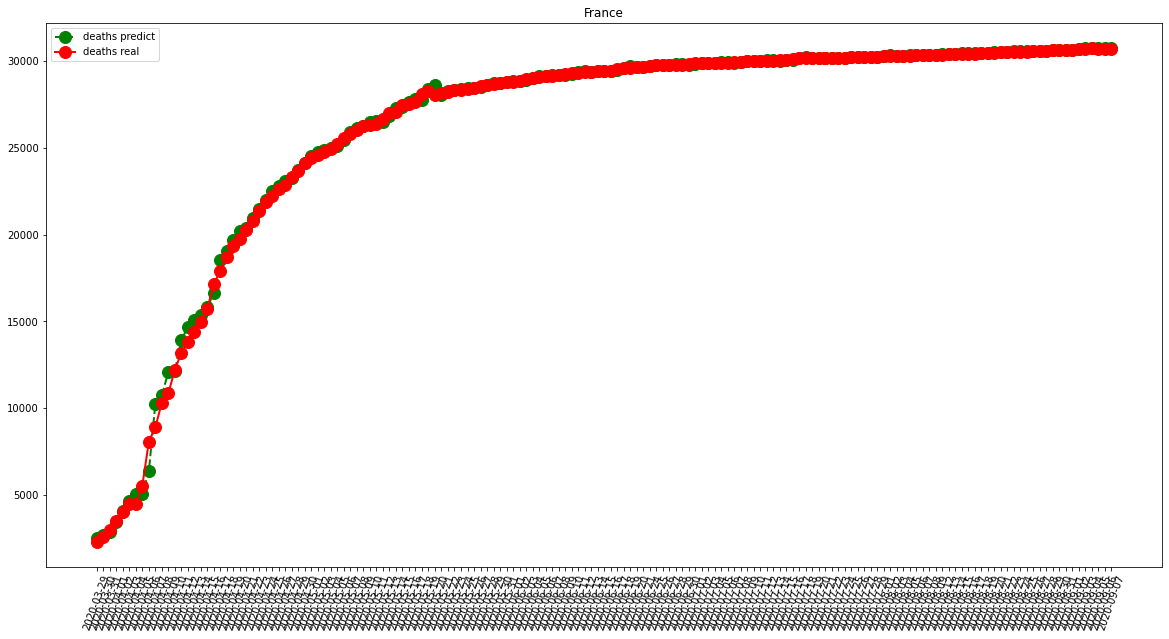

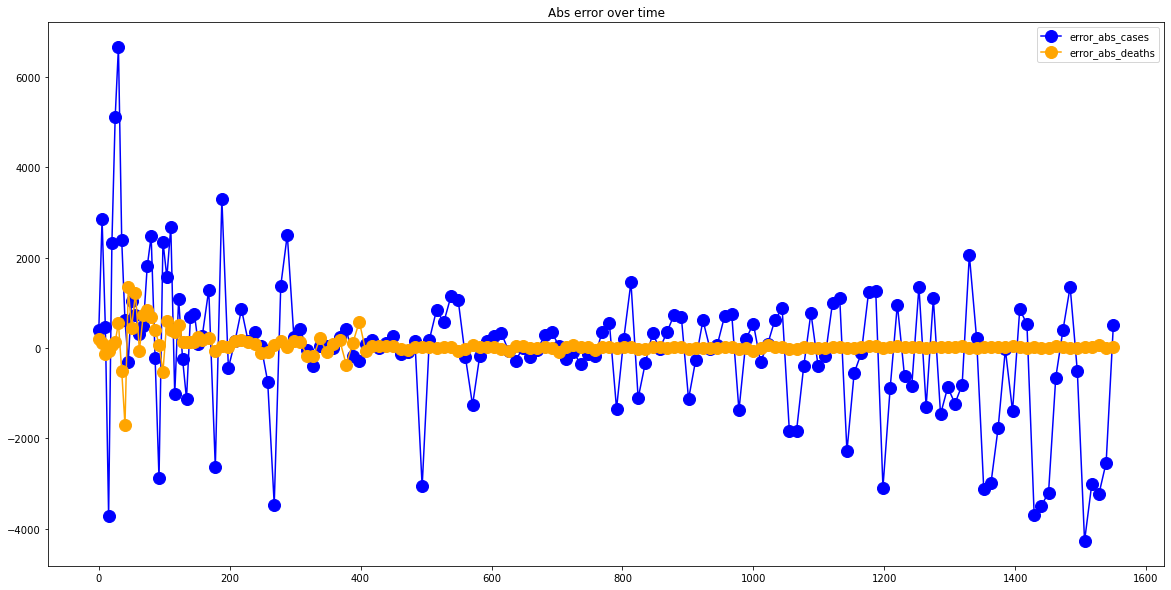

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.6392405063291
RMSE =  454.05042796944974
-- Italy performances for deaths --
MAE =  71.12025316455696
RMSE =  236.18265566176328


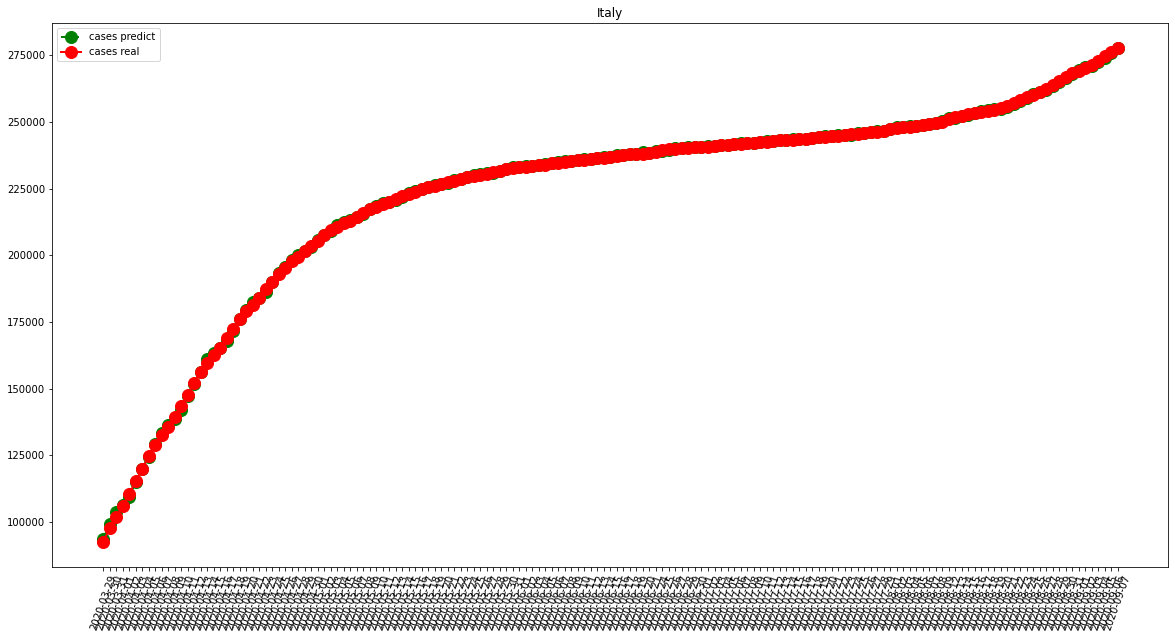

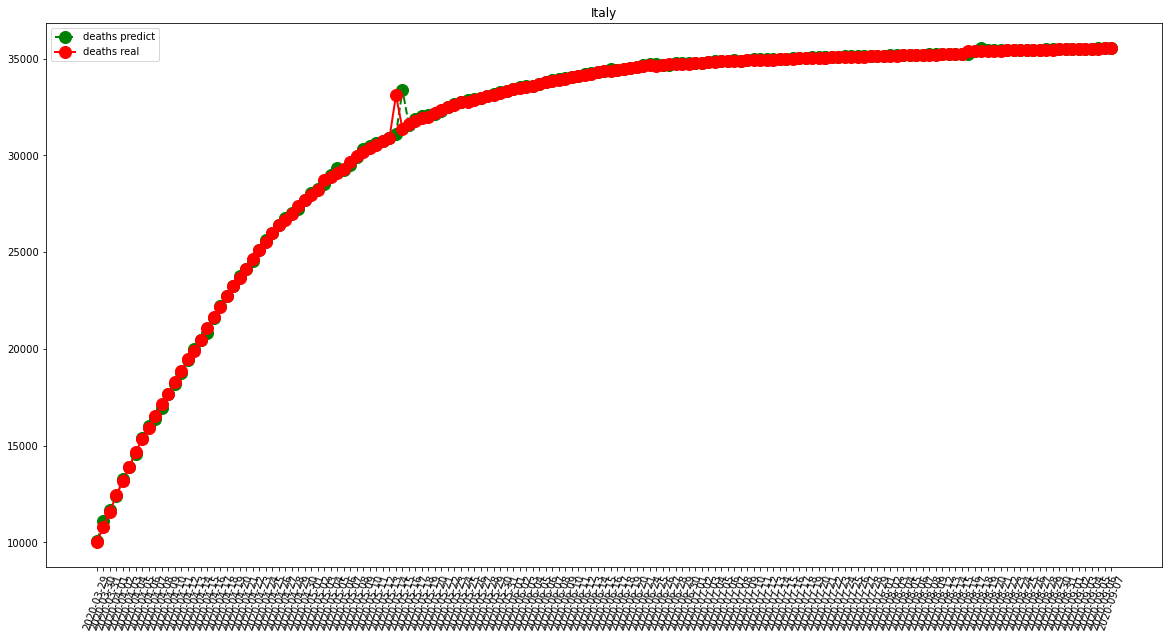

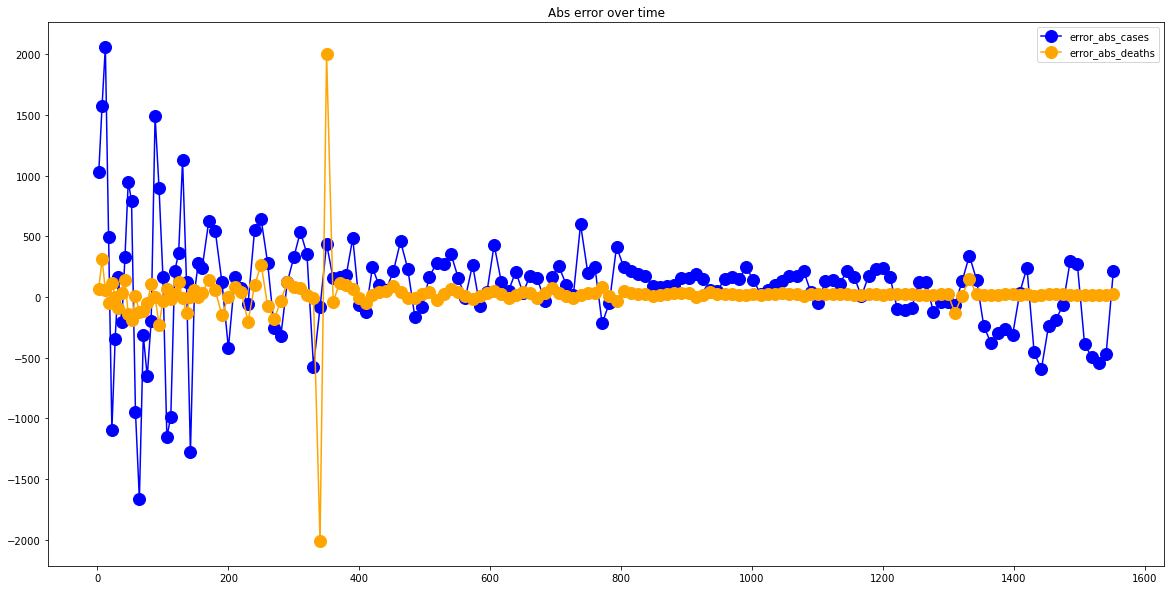

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2059.6139240506327
RMSE =  3929.808997033387
-- Spain performances for deaths --
MAE =  124.26582278481013
RMSE =  323.74354985999236


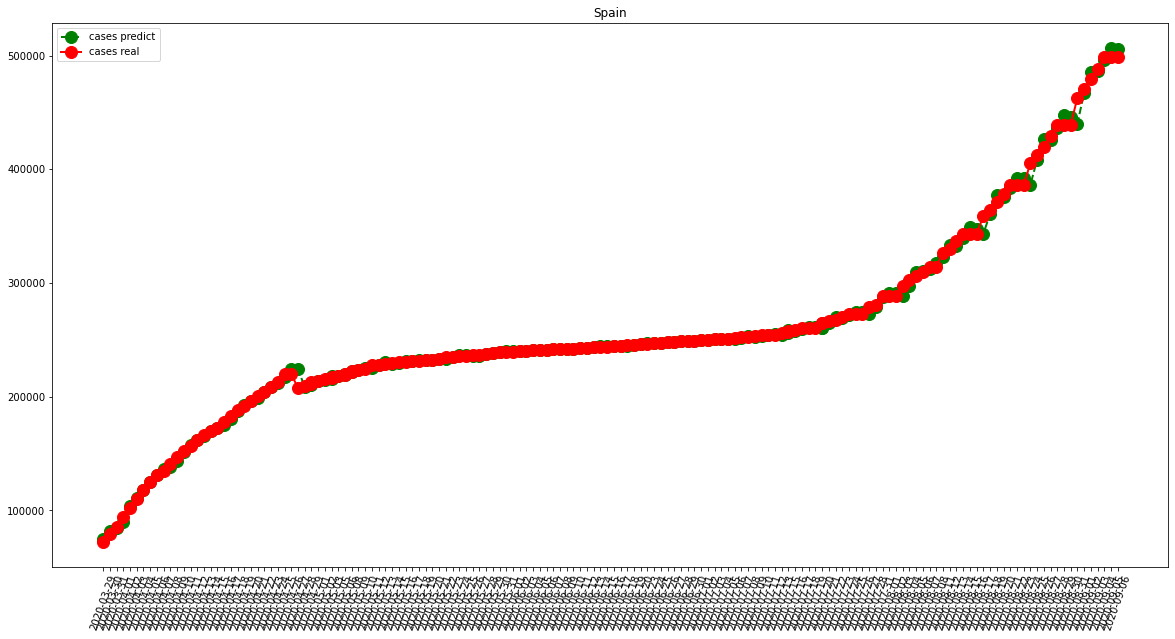

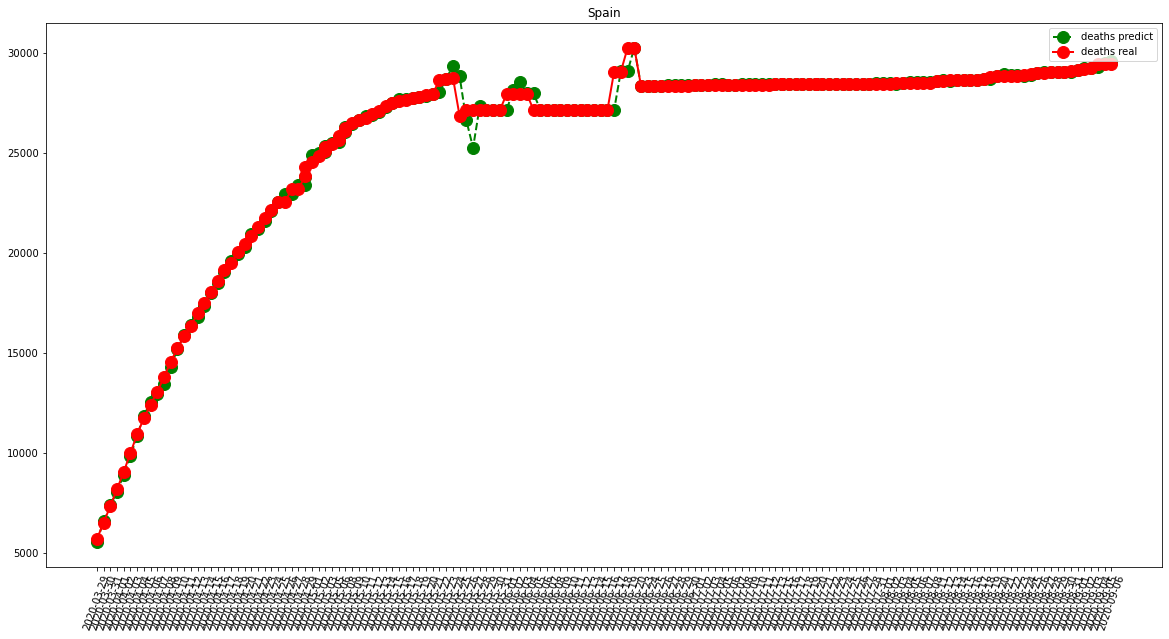

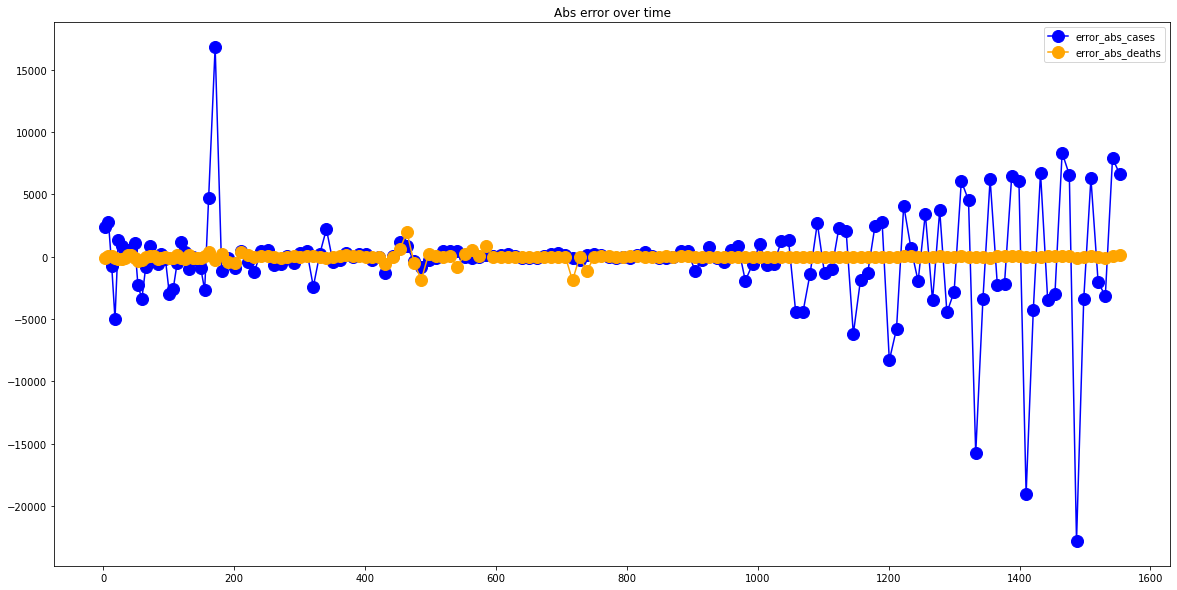

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  13198.227848101265
RMSE =  20265.744530292704
-- United States performances for deaths --
MAE =  485.10759493670884
RMSE =  684.3628423577657


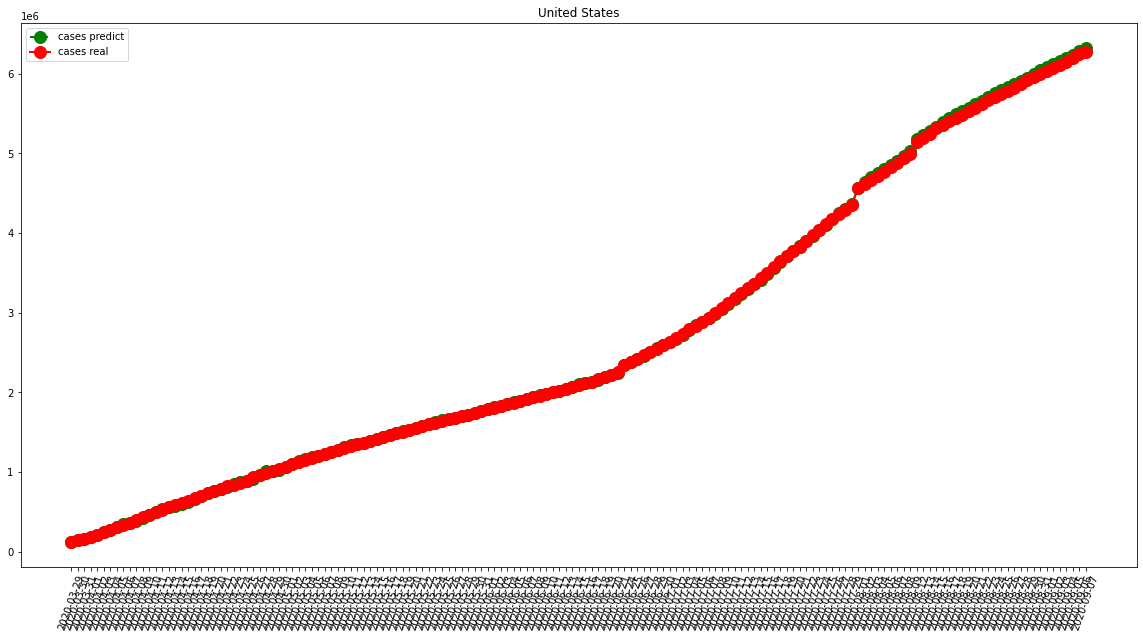

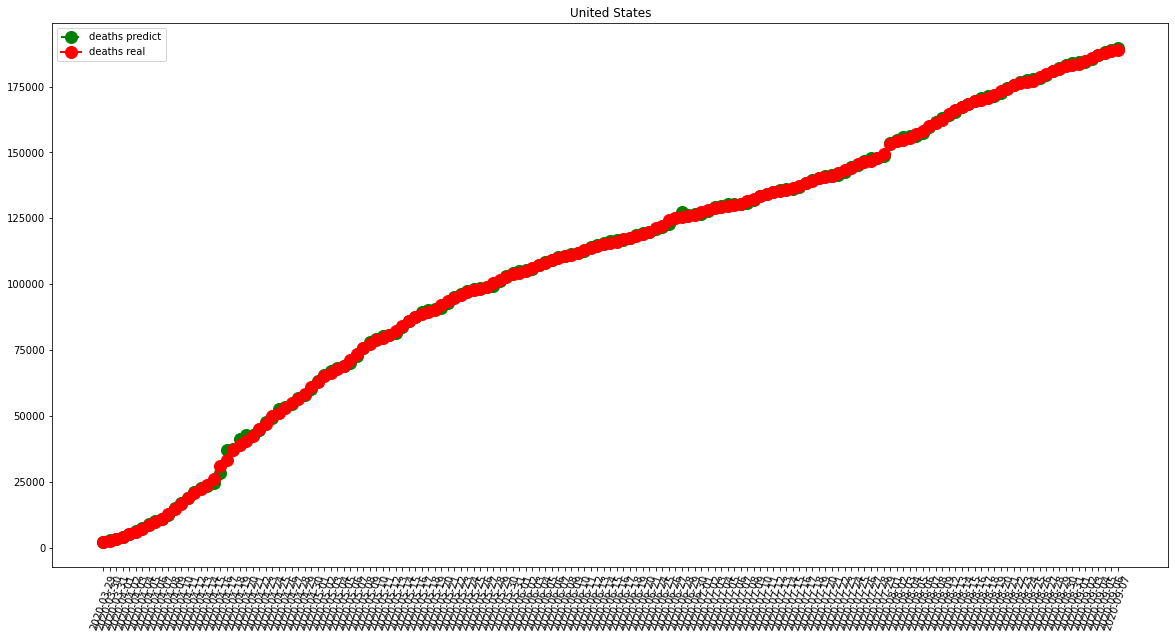

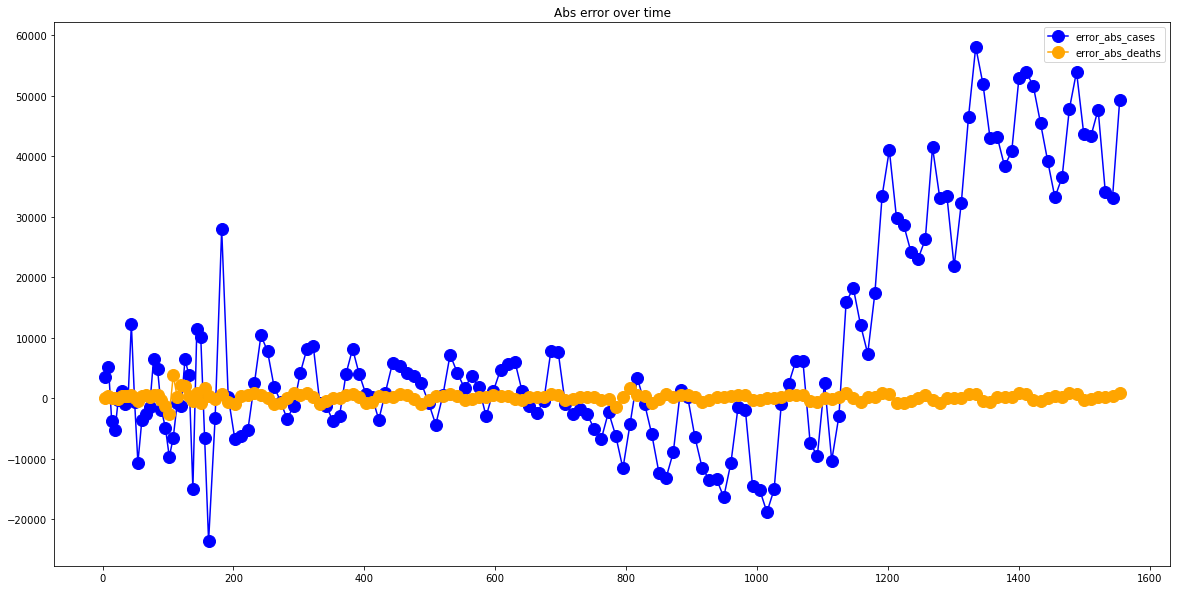

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  63.61392405063291
RMSE =  94.93905440140486
-- China performances for deaths --
MAE =  26.582278481012658
RMSE =  124.92610474024083


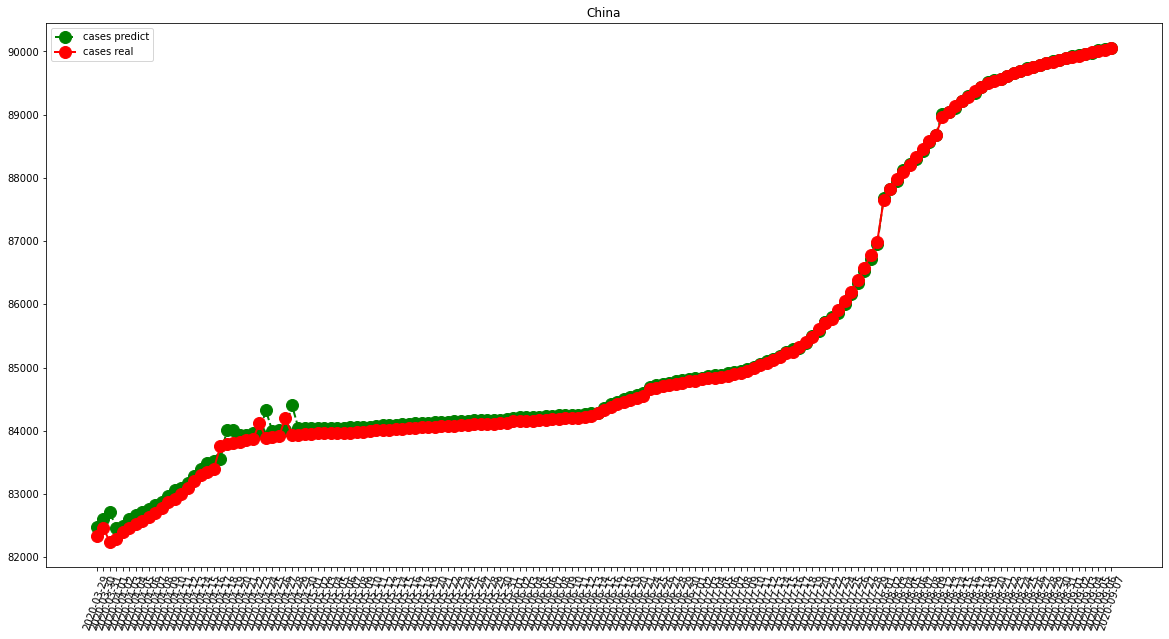

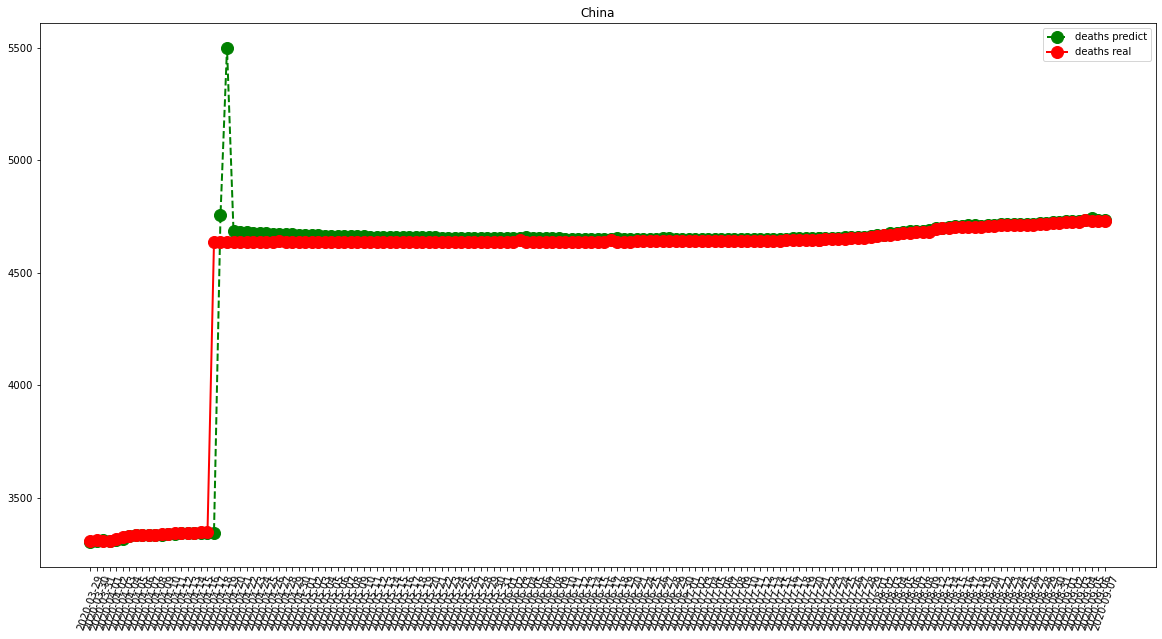

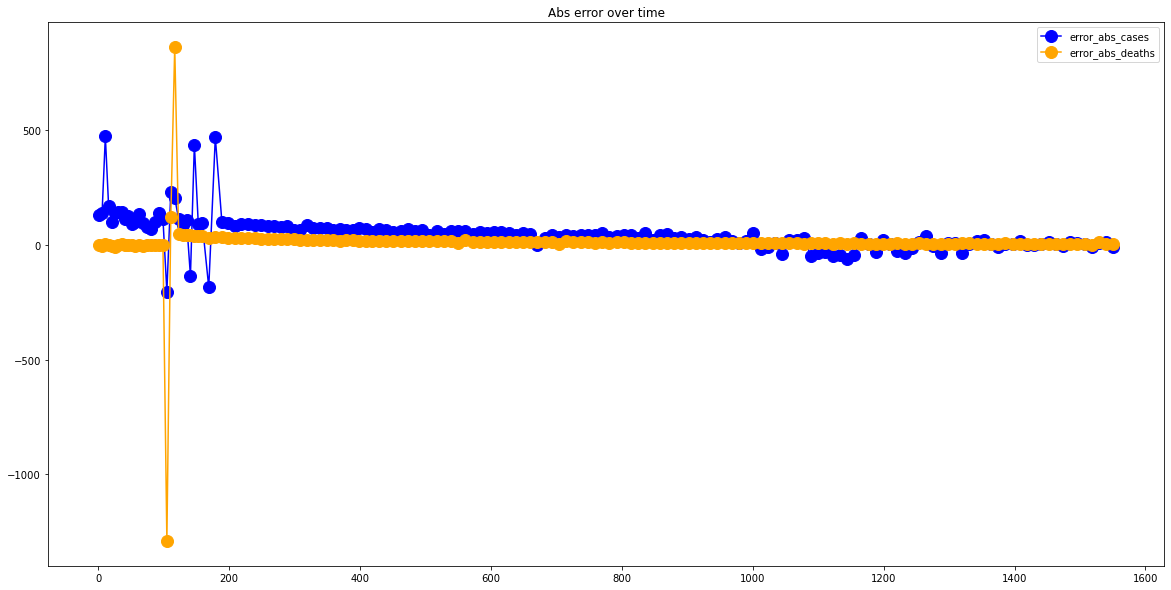

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1031.5846153846153
RMSE =  3669.3856706538763
-- United Kingdom performances for deaths --
MAE =  234.1076923076923
RMSE =  748.5247439515225


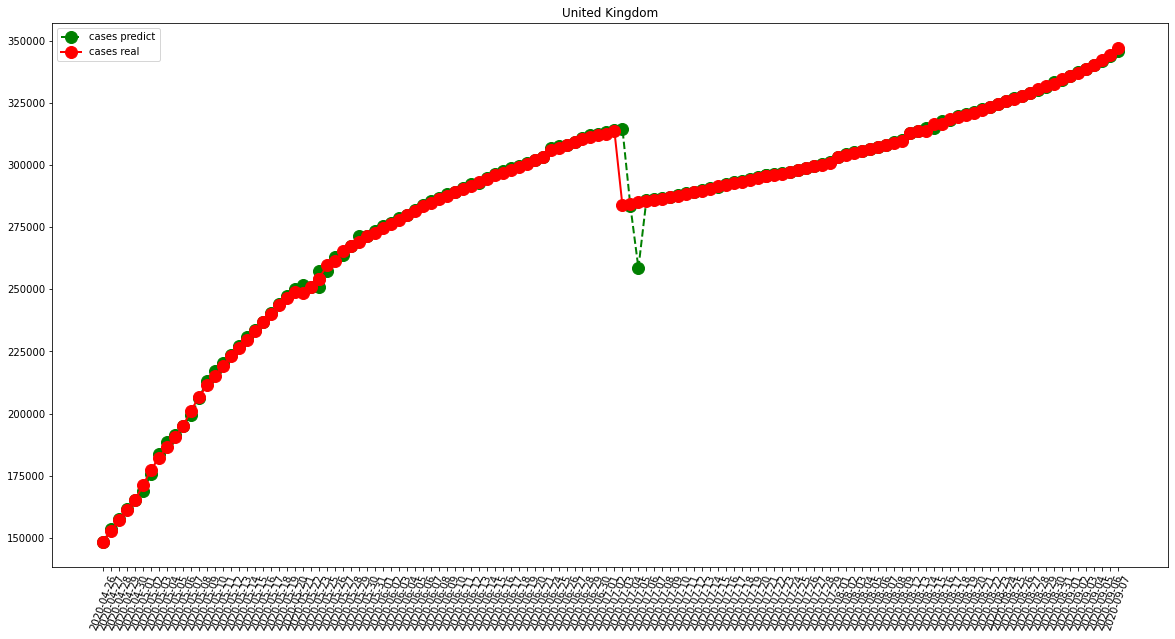

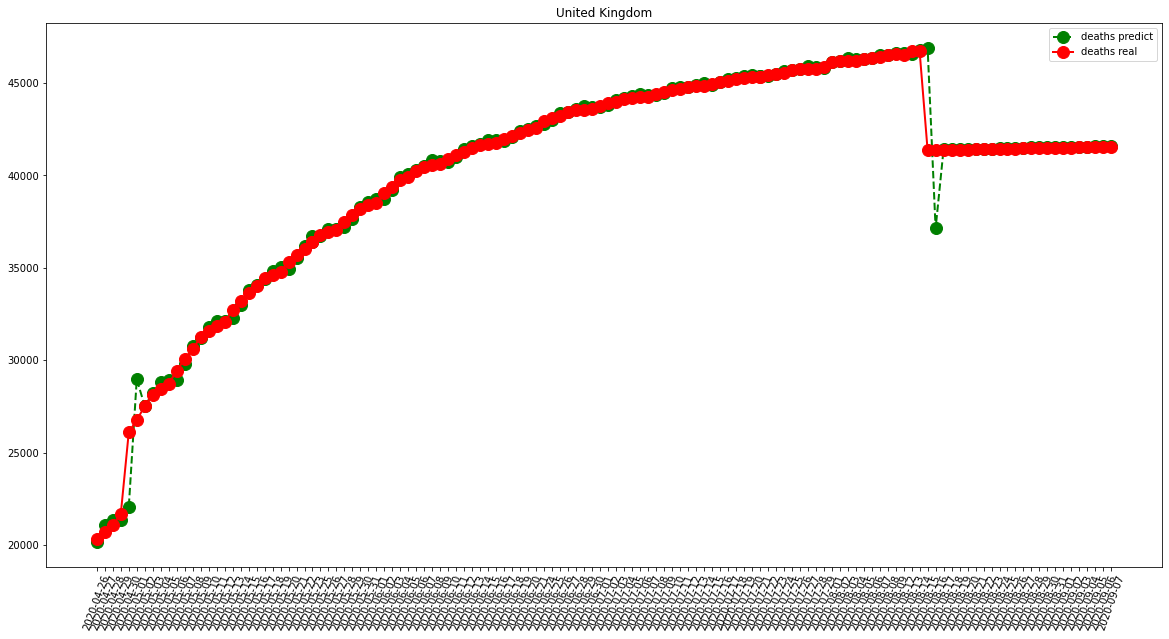

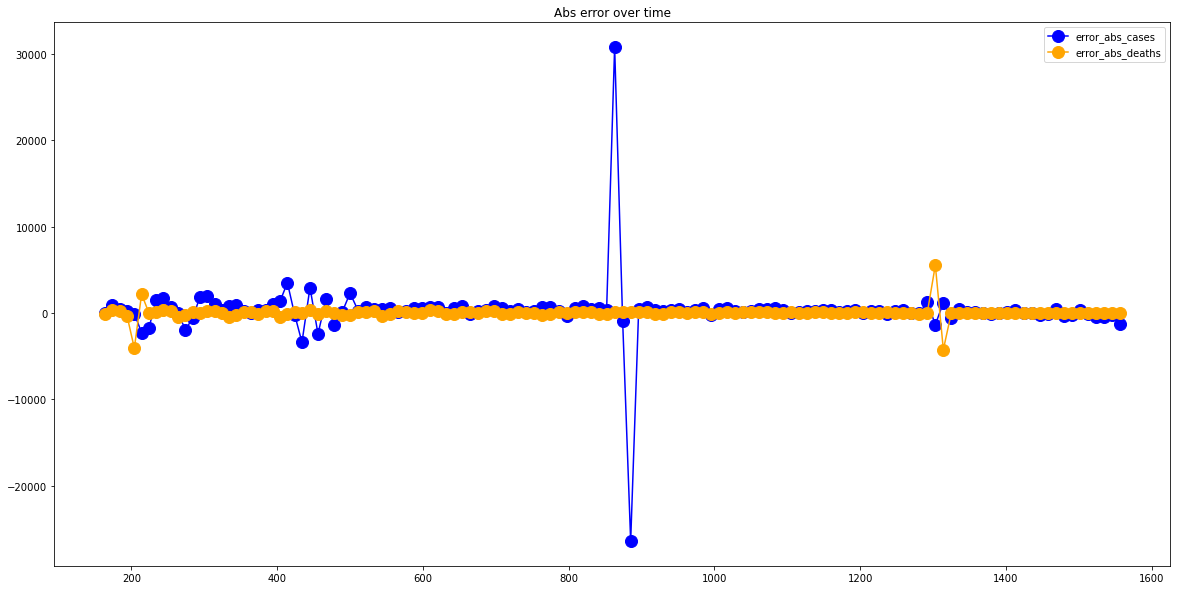

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  405.6
RMSE =  585.7738602776803
-- Germany performances for deaths --
MAE =  20.384615384615383
RMSE =  38.58935684276769


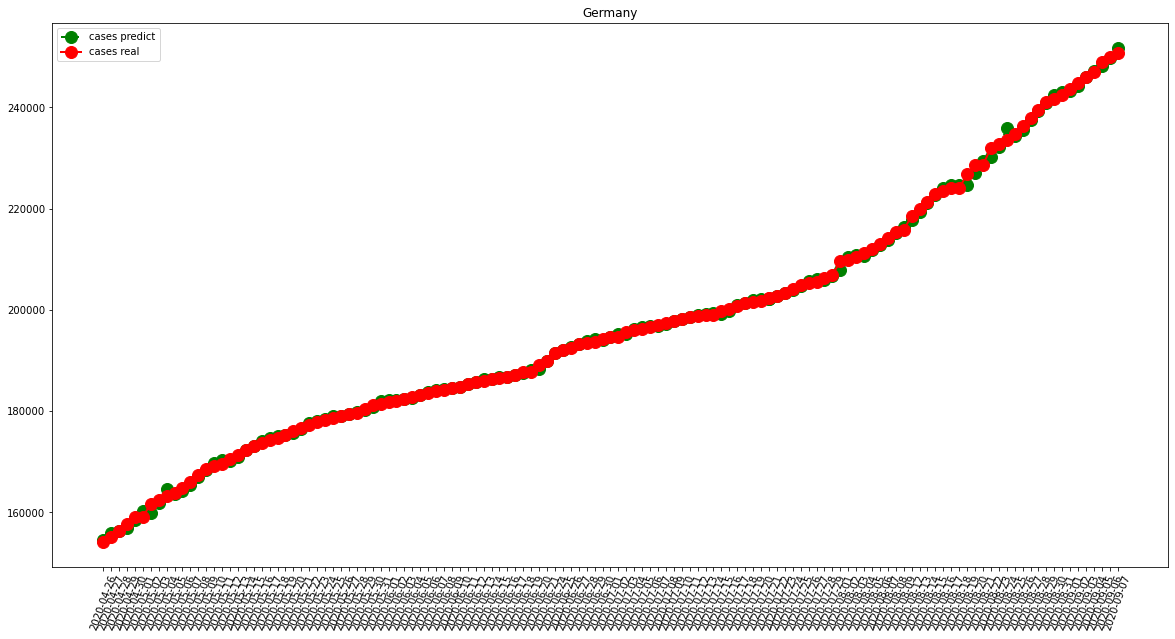

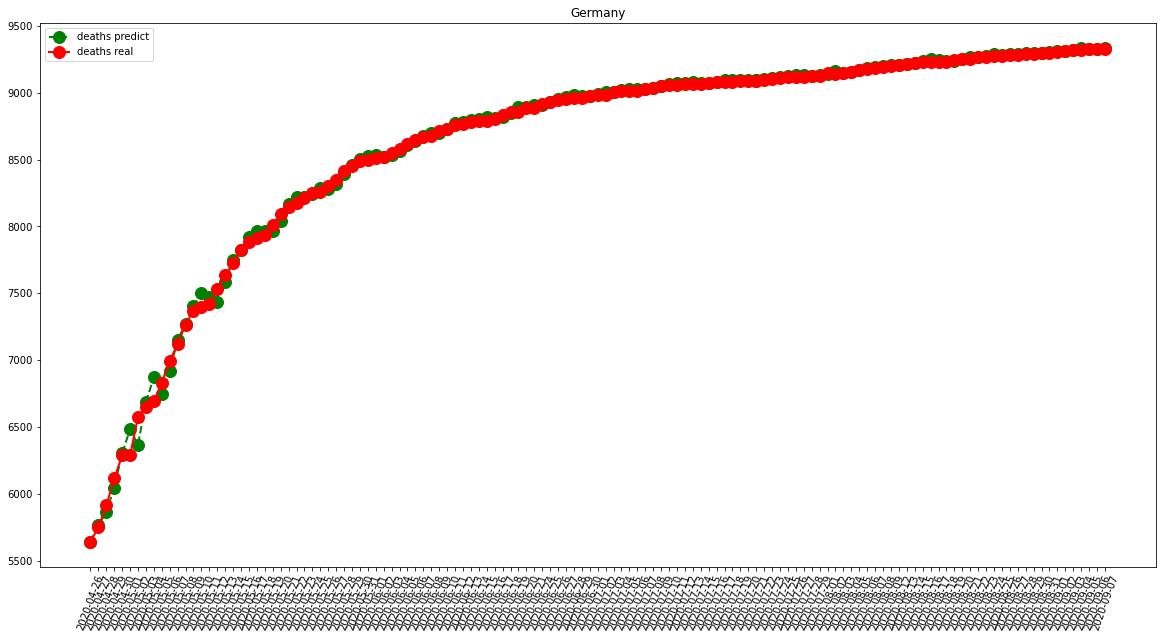

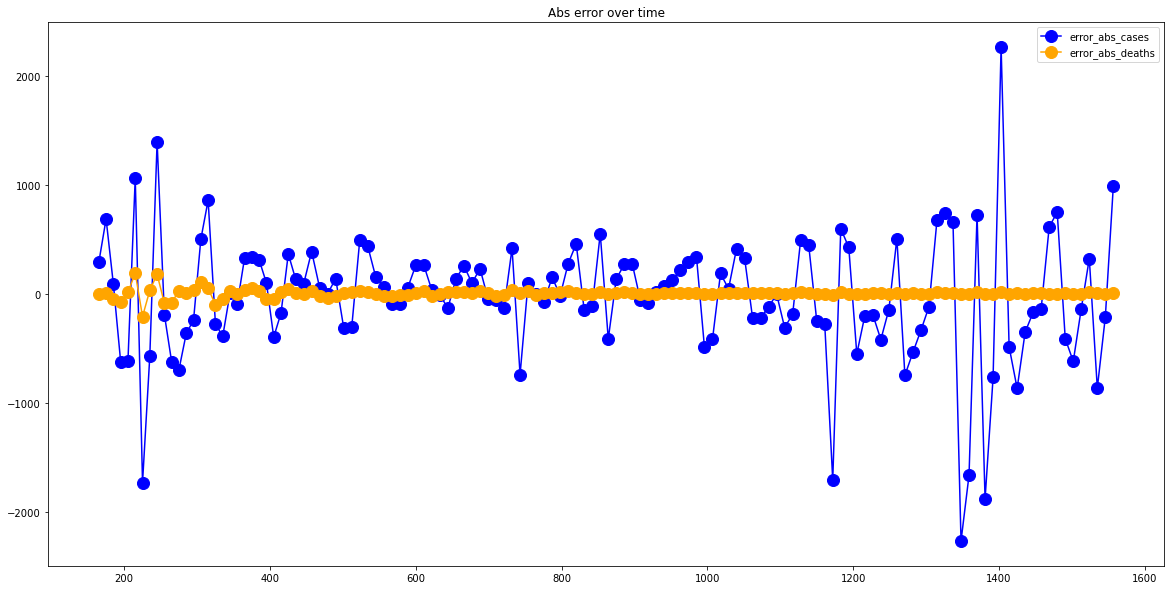

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  855.5461538461539
RMSE =  1232.191659043099
-- Iran performances for deaths --
MAE =  48.40769230769231
RMSE =  84.8442464392616


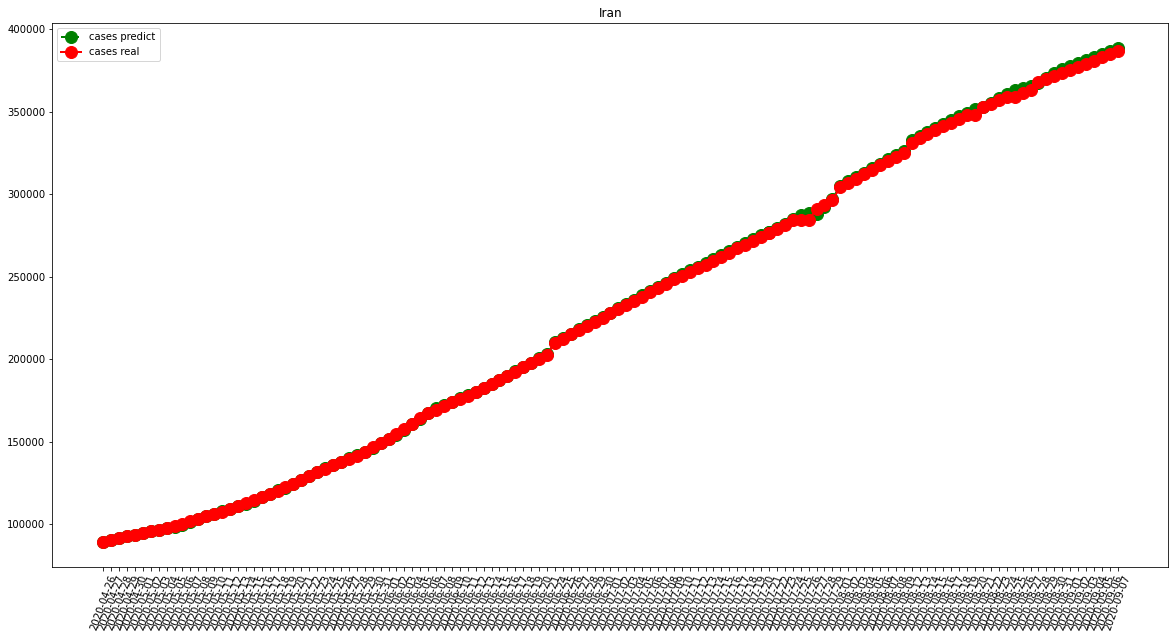

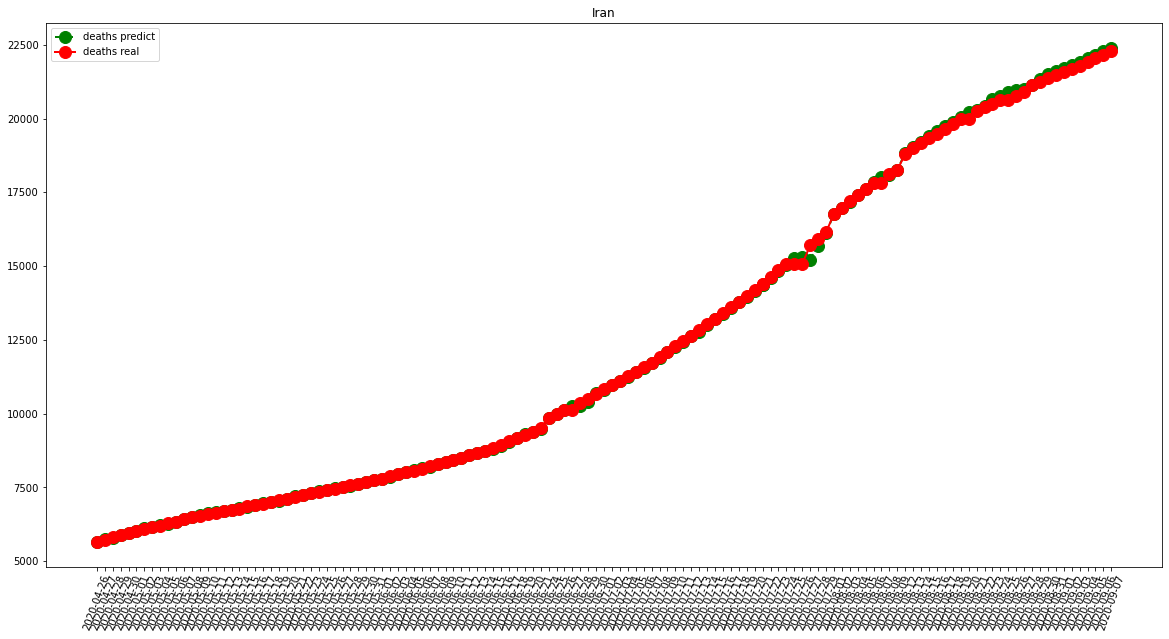

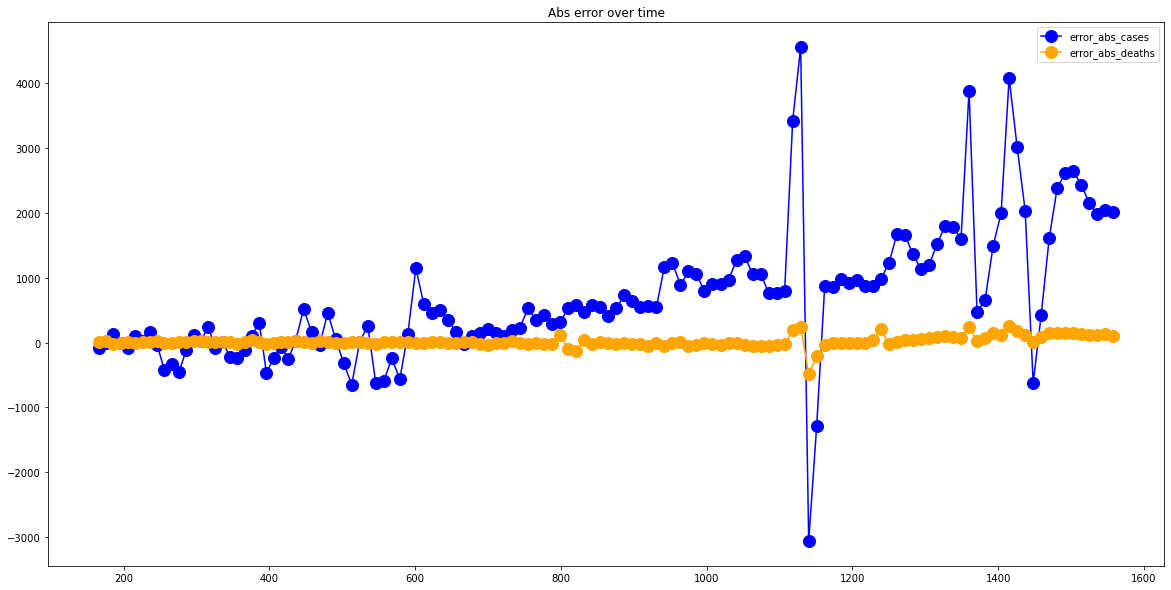

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  207.63846153846154
RMSE =  325.9913283414854
-- Turkey performances for deaths --
MAE =  16.184615384615384
RMSE =  89.13472948295743


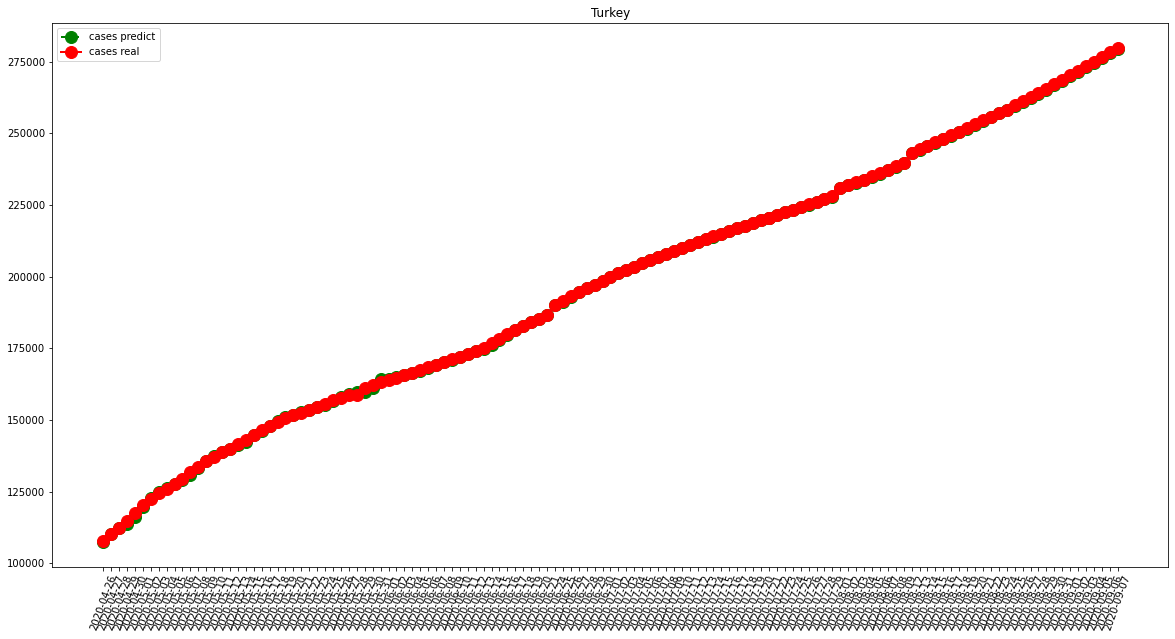

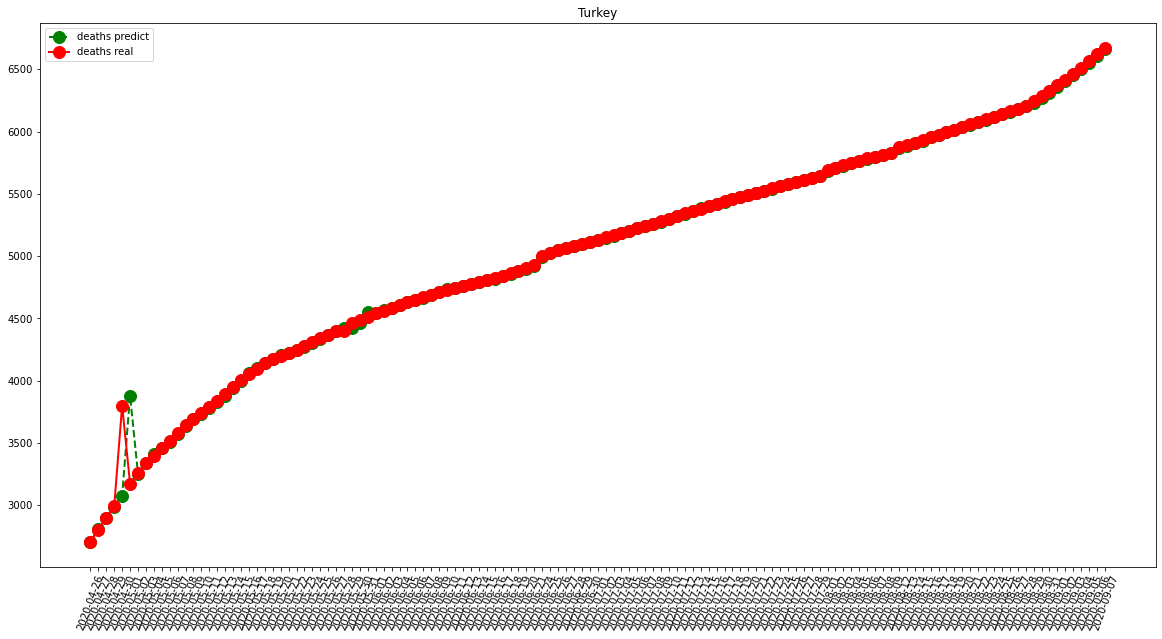

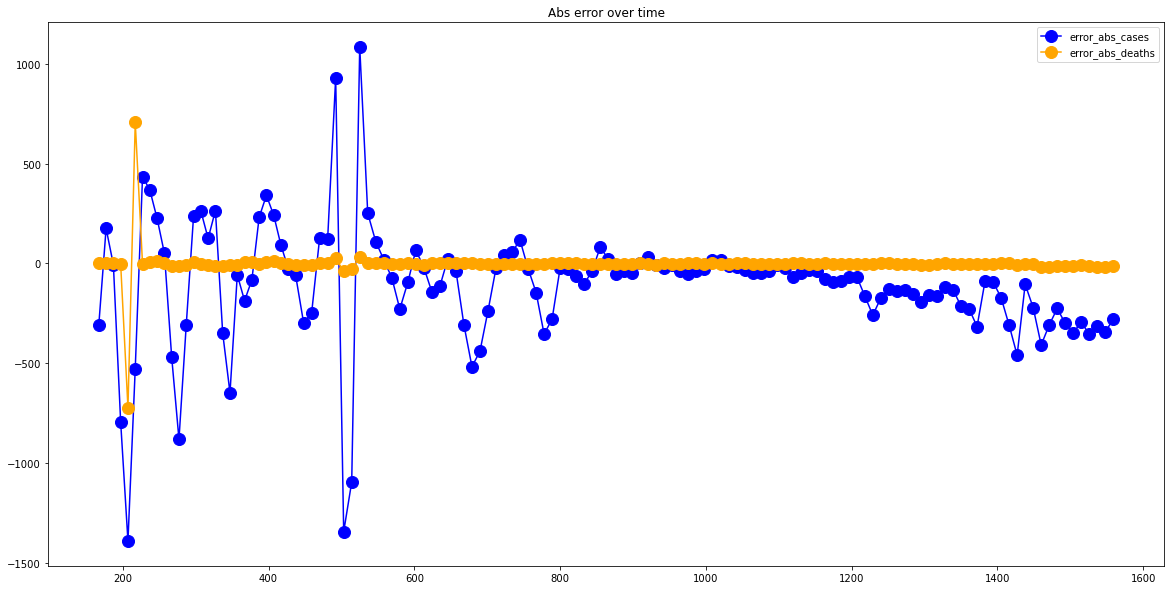

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  14471.174757281553
RMSE =  19172.15815297585
-- Brazil performances for deaths --
MAE =  450.75728155339806
RMSE =  551.4960060237918


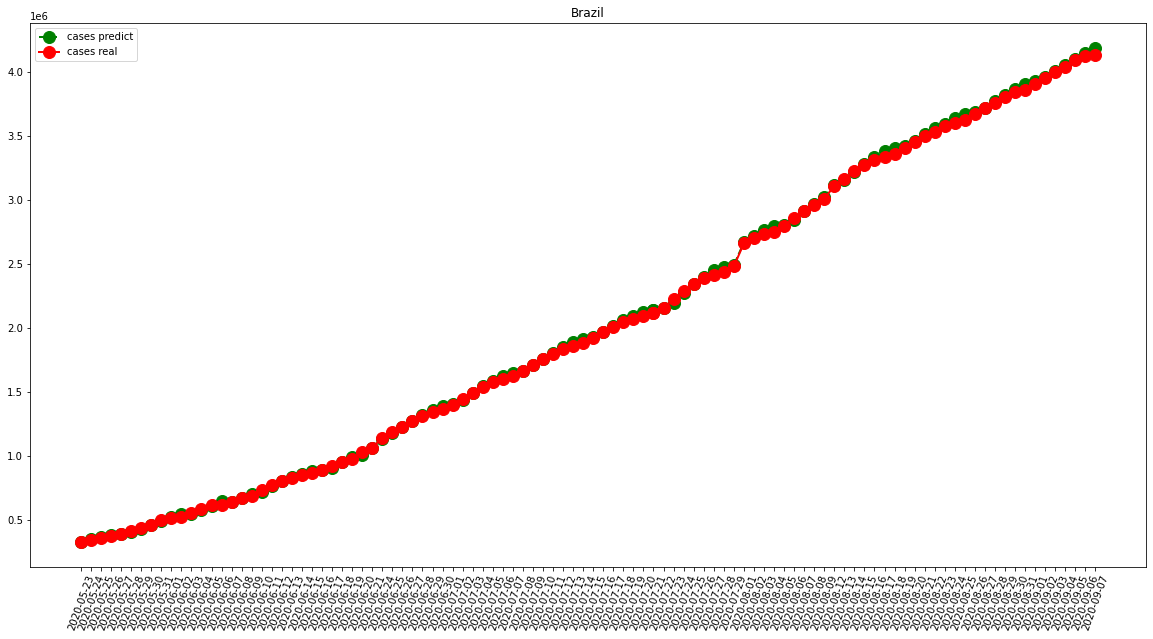

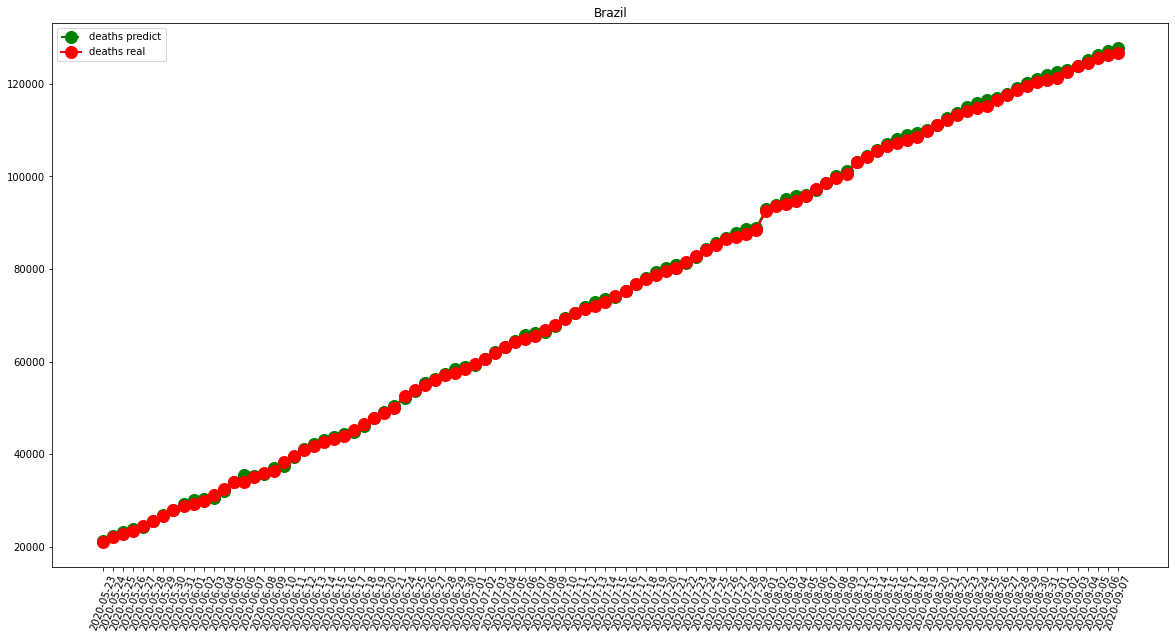

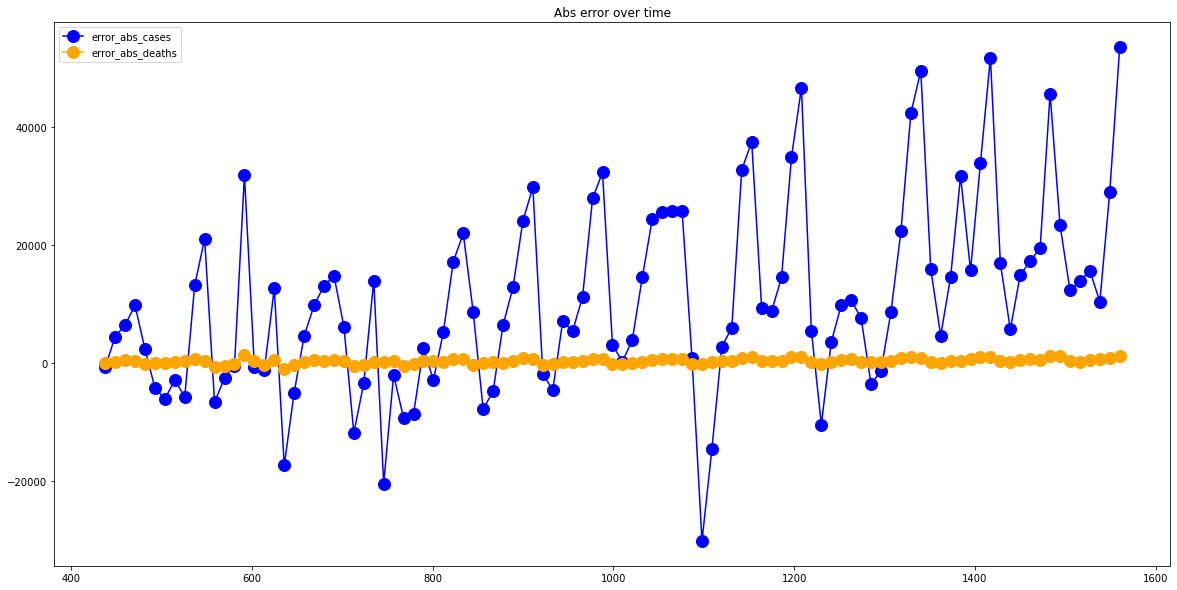

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)